Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [2]:
titanic_df = pd.read_csv("/content/train.csv")


In [3]:
print(titanic_df.info())
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

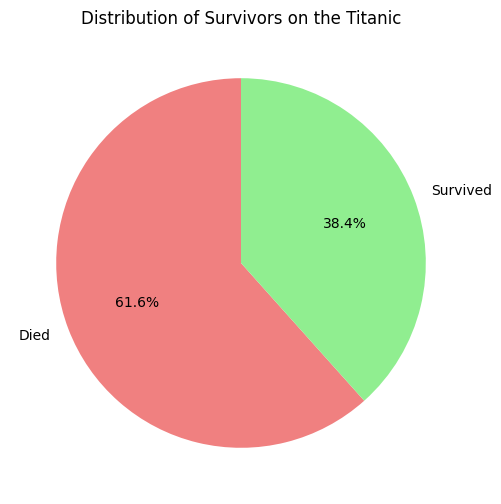

In [5]:
survived_count = titanic_df["Survived"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(survived_count, labels=["Died", "Survived"], autopct="%1.1f%%",
        colors=["lightcoral", "lightgreen"], startangle=90)

plt.title("Distribution of Survivors on the Titanic")
plt.show()

Дана кругова діаграма показує відсоток виживших та загиблих на кораблі. Зелений сектор (38.4%) - виживші, червоний сектор (61.6%) - загиблі. Отже, загинула більша кількість людей у той час, коли вижило трохи більше третини



3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


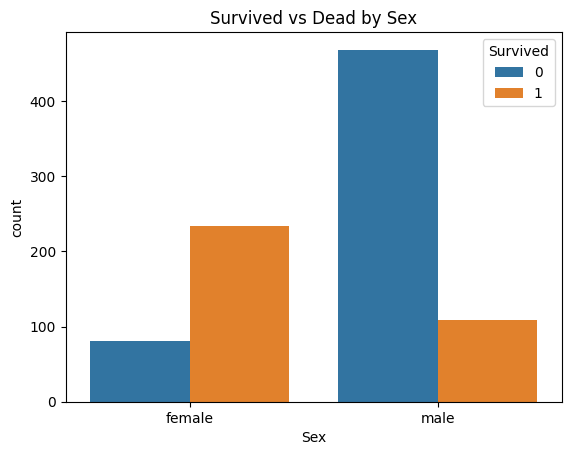

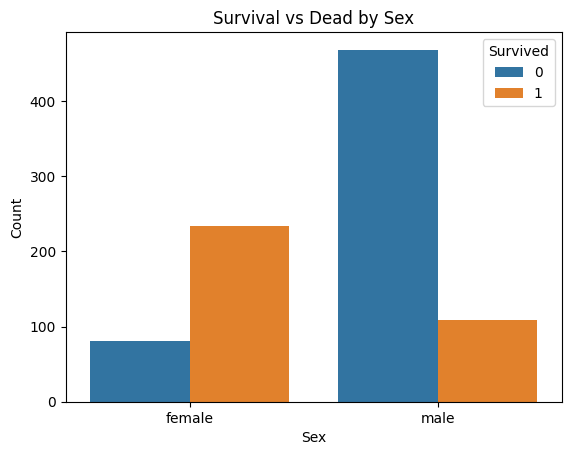

In [10]:
survived_by_sex = titanic_df.groupby(["Sex", "Survived"], as_index=False).size()
sns.barplot(data=survived_by_sex, x="Sex", y="size", hue="Survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival vs Dead by Sex")
plt.legend(title="Survived")
plt.show()

Стовпчикова діаграма відображає співвідношення загиблих до виживших для кожної статі. Синій колір відповідає за кількість загиблих, оранжевий - виживших.

Загальна кількість чоловіків на кораблі була більшою за кількість жінок. Кількість загиблих чоловіків значно перевищує кількість загиблих жінок, у той час як кількість виживших жінок перевищує кількість виживших чоловіків десь удвічі.

Серед жінок вижило більше, ніж загинуло, а серед чоловіків навпаки - значно більша частина загинула


4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

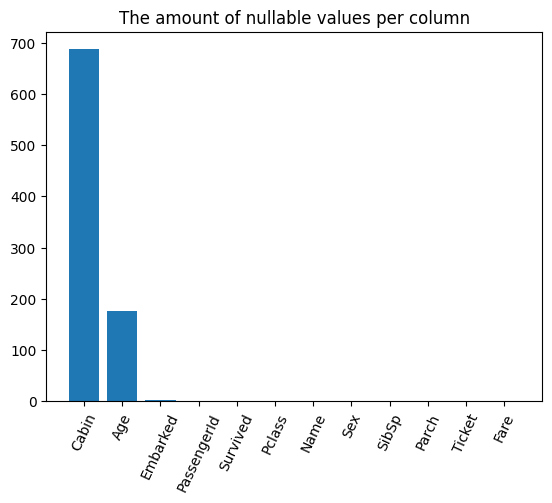

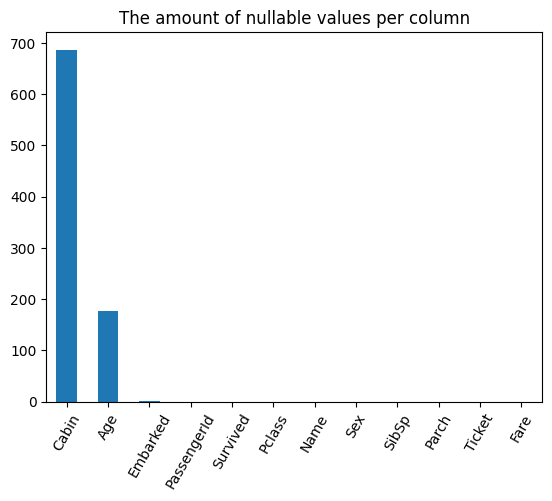

In [7]:
nullable_values = titanic_df.isnull().sum().sort_values(ascending=False)
nullable_values.plot(kind="bar")
plt.title("The amount of nullable values per column")
plt.xticks(rotation=60)
plt.show()

Дана діаграма показує кількість пропущених значень у кожному стовпці (відображення відбувається у спадному порядку). Можна зазначити, що найбільше пропущених значень у стовпці Cabin (близько 700). Далі на другому місці за кількістю пропущених значень - стовпець Age (близько 175). На третьому - стовпець Embarked, де кількість таких значень трохи більша за 0. У всіх інших стовпців нема пропущених значень





5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

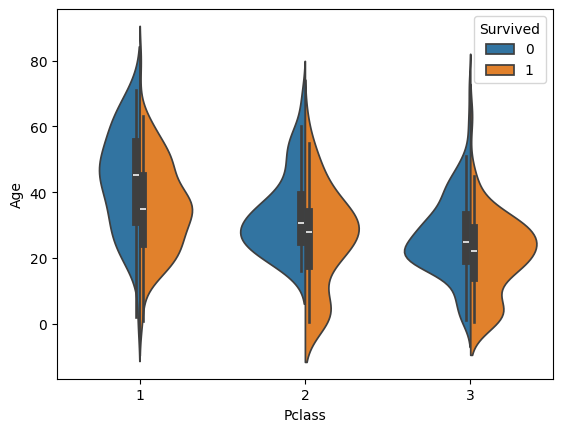

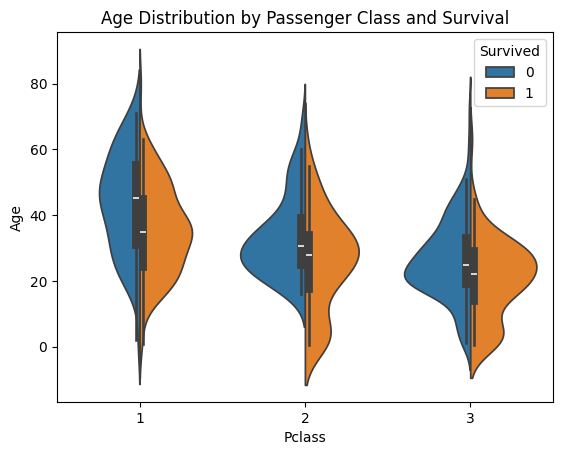

In [40]:
sns.violinplot(data=titanic_df, x="Pclass", y="Age", hue="Survived", split=True)
plt.title("Age Distribution by Passenger Class and Survival")
plt.show()

На скрипковій діаграмі відображається розподіл за віком виживших і загиблих пасажирів, що відносилися до певного класу. На осі х зображено клас пасажира, на осі у - вік. Також варто зазначити, що синій колір відповідає за загиблих, а оранжевий -  за виживших.

За даною діаграмою можна сказати, що середній вік загиблих був більшим, ніж вік тих, хто вижив, у всіх трьох класах. У першому класі середній вік загиблих дорівнює близько 45 рокам, а виживших - 35. У другому класі середній вік загиблих та виживших приблизно однаковий (близько 30). У третьому: близько 25 та 22 відповідно. Також у другому та третьому класах можна спостерігати більшу частку дітей віком до 15 років порівняно з першим класом. А от у першому навпаки більша частка людей від 40 років порівняно з іншими класами.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


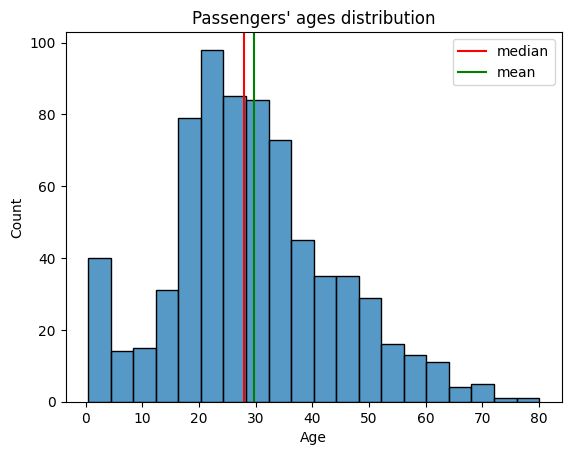

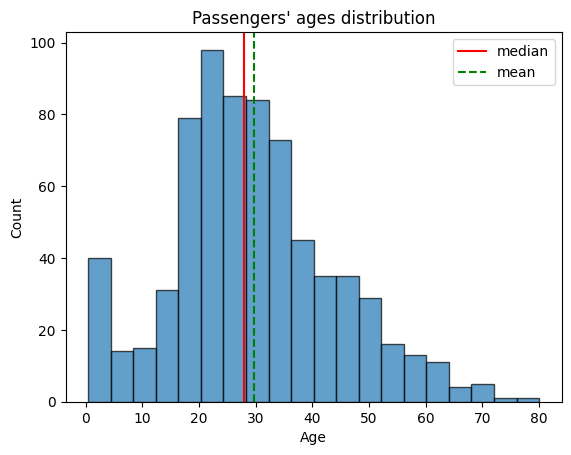

In [8]:
age_data = titanic_df["Age"].dropna()
plt.hist(age_data, edgecolor="black", bins=20, alpha=0.7)
median_age = age_data.median()
mean_age = age_data.mean()
plt.axvline(median_age, color="red", linestyle="-", linewidth=1.5, label="median")
plt.axvline(mean_age, color="green", linestyle="--", linewidth=1.5, label="mean")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passengers\' ages distribution")
plt.legend()
plt.show()

Гістограма показує розподіл віку пасажирів на кораблі. Також відображені дві лінії (червона вказує на медіанний вік пасажирів, зелена - на середній вік).

 Серед пасажирів найбільшою була кількість людей у віковій групі 20-24 роки (близько 100). Також можна побачити певну частку маленьких дітей у віці 0-4 роки, що може бути пов'язано із сімейними подорожами. Найменша кількість людей 72-80 років (менше 10 осіб).

 Медіанний вік становить 28 років, середній - близько 30

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

1. Яке співвідношення загиблих до виживших на кораблі за класом?
2. Яке співвідношення жінок до чоловіків серед виживших за класом?

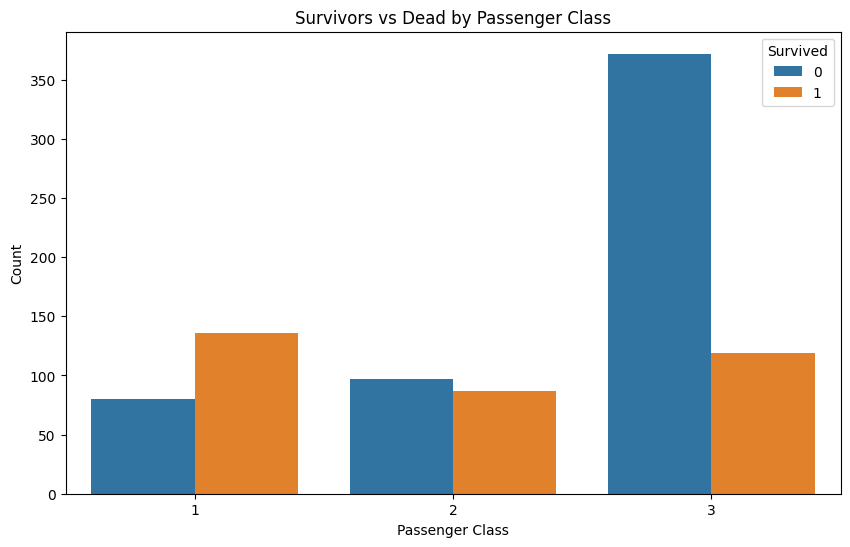

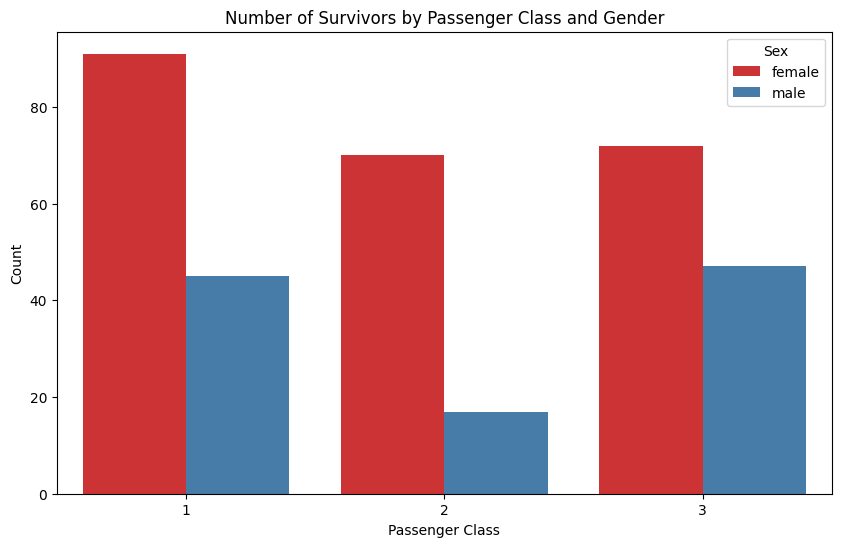

In [9]:
survived_by_class = titanic_df.groupby(["Pclass", "Survived"]).size().unstack()
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x="Pclass", hue="Survived")
plt.title("Survivors vs Dead by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()


survivors_df = titanic_df[titanic_df["Survived"] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(data=survivors_df, x="Pclass", hue="Sex", palette="Set1")
plt.title("Number of Survivors by Passenger Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()


1. Яке співвідношення загиблих до виживших на кораблі за класом?

  Діаграма відображає кількість виживших та загиблих людей у кожному класі. Загалом найбільше людей було у 3 класі. Згідно з діаграмою найменше загинуло людей з 1 класу, а найбільше - з 3 (це може бути пов'язано із наданням пріоритету людям з вищих класів в плані евакуації, коли люди з нижчих мали це робити самостійно) У той же час найбільше людей вижило теж з 1 класу, а найменше - з 2.

2. Яке співвідношення жінок до чоловіків серед виживших за класом?

  Серед усіх класів кількість виживших жінок перевищує кількість виживших чоловіків. Найбільше вижило жінок з 1 класу (близько 90), з 2 та 3 приблизно однакова кількість (близько 70 в кожному). Серед чоловіків найбільше вижило з 1 та 3 класу (десь 45 в кожному), а найменше з 2 (близько 17 осіб).

  Можна припустити, що кількість виживших жінок перевищує кількість чоловіків через принцип "жінок та дітей рятувати першими".


# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

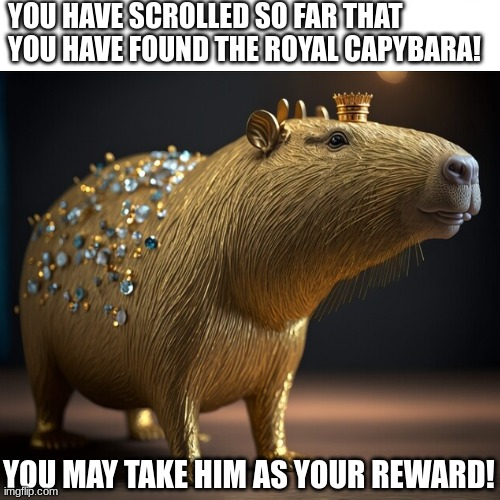